In [56]:
# Libraries
import random
import numpy
import matplotlib.pyplot
import matplotlib as plt
## file with the solution of the fire fighter problem
import ffp


In [57]:
# Get size of the list for N nodes
def listSize(n_nodes):
    '''
    sumatoria de 1 a n - 1'''
    return sum(range(1,n_nodes))

In [58]:
# Individual initialization
def createIndividual(n):
    ans = []
    for num in range(n):
        ans.append(numpy.random.choice([0,0,0,0,0,0,0,0,1,1]))  
    # return numpy.random.randint(0 , 2, n)
    return numpy.array(ans)
p = createIndividual(10)
print(p)

[0 0 0 1 1 0 0 0 0 0]


In [59]:
def listToMatrix(arrs, n):
    '''
    Transform a list to a supirior triangule of a matrix
    '''
    arr = arrs.tolist()
    matrix = [[ 0 for x in range (n)] for x in range (n)] 
    # for val in arr : 
    for i in range(n):
        for j in range (i+1,n):
            matrix[i][j] = arr.pop(0)
            matrix[j][i] = matrix[i][j]
    return matrix
# print(listSize(5))
# print(createIndividual(listSize(5)))
# [1 0 1 0 0 1 1 1 0 1]
for li in listToMatrix(numpy.array([0 ,0 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ]),10):
    print(li )

[0, 0, 0, 1, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 0, 1, 1, 1]
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 1, 1, 0, 1, 0]
[1, 1, 1, 0, 1, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 0, 0, 0, 0, 1, 1]
[0, 1, 1, 0, 1, 0, 0, 1, 0, 1]
[0, 1, 1, 0, 0, 0, 0, 1, 1, 0]


In [60]:
# Evaluation function
def evaluate(individual, n):
    ffp.resetValues()
    ffp.adjacency = numpy.array(listToMatrix(individual,n))
    #& global
    ffp.ffp(ffp.degreeGlobal, False)
    ans_global = ffp.n_burned

    #& Local
    ffp.resetValues()
    ffp.ffp(ffp.degreeLocal, False)
    ans_local = ffp.n_burned

    #& BST
    ffp.resetValues()
    ffp.ffp(ffp.biggestSubtree,False)
    ans_bst = ffp.n_burned

    #& BGC
    ffp.resetValues()
    ffp.ffp(ffp.biggestGrandChildren,False)
    ans_bgc = ffp.n_burned
    return ( min(ans_local,ans_global, ans_bst)-  ans_bgc) 
  
minum = 12
p1 = createIndividual(listSize(minum))
# print(p1)
print(evaluate(p1,minum))

0


In [61]:
# Tournament selection
def select(population, evaluation, tSize):
  winner = numpy.random.randint(0, len(population))
  for i in range(tSize - 1):
    rival = numpy.random.randint(0, len(population))
    if (evaluation[rival] > evaluation[winner]):
      winner = rival
  return population[winner]

In [62]:
# Crossover operator
def combine(parentA, parentB, cRate):
  if (random.random() <= cRate):
    cPoint = numpy.random.randint(1, len(parentA))
    #print(cPoint)
    offspringA = numpy.append(parentA[0:cPoint], parentB[cPoint:])
    offspringB = numpy.append(parentB[0:cPoint], parentA[cPoint:])
  else:
    offspringA = numpy.copy(parentA)
    offspringB = numpy.copy(parentB)
  return offspringA, offspringB

p1 = createIndividual(10)
p2 = createIndividual(10)
print(p1)
print(p2)
o1, o2 = combine(p1, p2, 1.0)
print(o1)
print(o2)


[1 0 0 1 0 0 0 1 0 0]
[0 0 1 0 0 0 0 0 0 0]
[1 0 0 1 0 0 0 0 0 0]
[0 0 1 0 0 0 0 1 0 0]


In [63]:
# Mutation operator
def mutate(individual, mRate):
  for i in range(len(individual)):
    if (random.random() <= mRate):
      individual[i] = not(individual[i])
  return individual

p1 = createIndividual(10)
print(p1)
mutate(p1, 0.10)
print(p1)

[0 1 0 0 0 0 0 1 0 0]
[0 1 1 0 0 0 0 1 0 0]


In [64]:
# Genetic algorithm
def geneticAlgorithm(n, pSize, gens, cRate, mRate):
  # Creates the initial population
  population = [None] * pSize
  evaluation = [None] * pSize
  size_of_list = listSize(n)
  for i in range(pSize):
    population[i] = createIndividual(size_of_list)
    evaluation[i] = evaluate(population[i], n)
  # Keeps a record of the best individual found so far
  index = 0
  for i in range(1, pSize):
    if (evaluation[i] > evaluation[index]):
      index = i
  bestIndividual = population[index]
  bestEvaluation = evaluation[index]
  bbEvalaluation = []
  bbIndividuals = []
  bbEvalaluation.append(bestEvaluation)
  bbIndividuals.append(bestIndividual)
  # Keeps the information for plotting the performance of the algorithm
  best = [0] * gens
  avg = [0] * gens
  # Runs the evolutionary process
  for i in range(gens):
    k = 0
    newPopulation = [None] * pSize
    # Crossover
    for j in range(pSize // 2):
      parentA = select(population, evaluation, 3)
      parentB = select(population, evaluation, 3)
      offspring1, offspring2 = combine(parentA, parentB, cRate)
      newPopulation[k] = offspring1
      newPopulation[k + 1] = offspring2
      k = k + 2
    population = newPopulation
    # Mutation
    for j in range(pSize):
      population[j] = mutate(population[j], mRate)
      evaluation[j] = evaluate(population[j], n)
      # Keeps a record of the best individual found so far
      if (evaluation[j] > bestEvaluation):
        bestEvaluation = evaluation[j]
        bestIndividual = population[j]
      best[i] = bestEvaluation
      avg[i] = numpy.average(evaluation)
    bbEvalaluation.append(bestEvaluation)
    bbIndividuals.append(bestIndividual)
  matplotlib.pyplot.plot(range(gens), best, label = "Best")
  matplotlib.pyplot.plot(range(gens), avg, label = "Average")
  matplotlib.pyplot.legend()
  matplotlib.pyplot.title("GA Run")
  matplotlib.pyplot.show()
  # Returns the best individual found so far
  return bestIndividual, bestEvaluation, bbEvalaluation, bbIndividuals

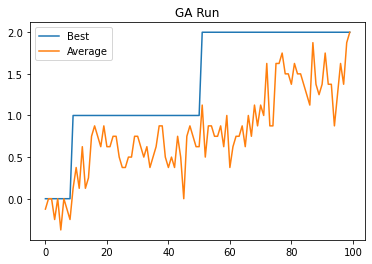

evaluation: 2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [65]:
# Tests
nodes = 10
generations = 100
population = 8
solution, eval ,allBestEvaluations, allBestIndv= geneticAlgorithm(nodes, population, generations, 1.0, 0.01)
# print(eval)
# print(solution)
print('evaluation:',eval)
print(allBestEvaluations)

#### Best Individual

In [66]:

matrixSolution = listToMatrix(solution, nodes)
print(matrixSolution)


[[0, 1, 0, 0, 0, 1, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 1, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 0, 1, 0, 1, 0]]


#### Visualization of both methods

#### Gloabal

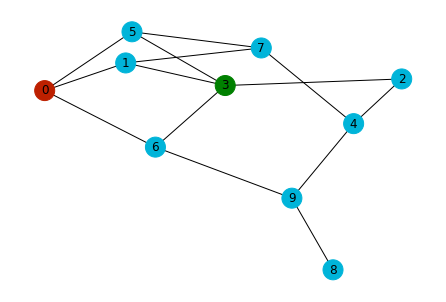

Lista currNode por quemar {1, 5, 6}
currNode ya quemados [0]
currNode protegidos [3]

----------------------------------------


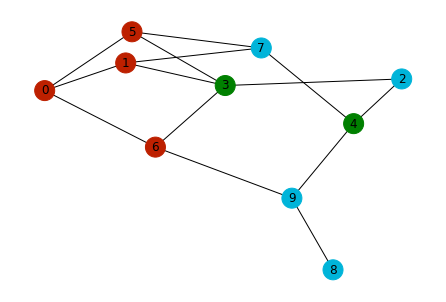

Lista currNode por quemar {9, 7}
currNode ya quemados [0, 1, 5, 6]
currNode protegidos [3, 4]

----------------------------------------


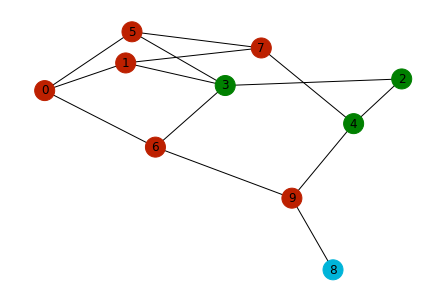

Lista currNode por quemar {8}
currNode ya quemados [0, 1, 5, 6, 9, 7]
currNode protegidos [3, 4, 2]

----------------------------------------


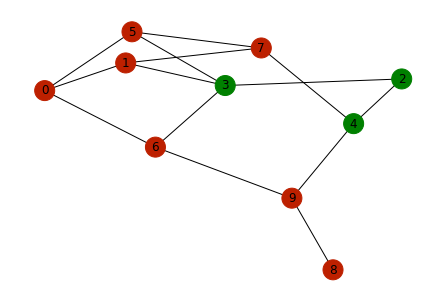

Lista currNode por quemar set()
currNode ya quemados [0, 1, 5, 6, 9, 7, 8]
currNode protegidos [3, 4, 2]

----------------------------------------


7

In [67]:
ffp.resetValues()
ffp.adjacency = numpy.array(matrixSolution)
ffp.ffp(ffp.degreeGlobal, True)
ffp.n_burned

#### Local

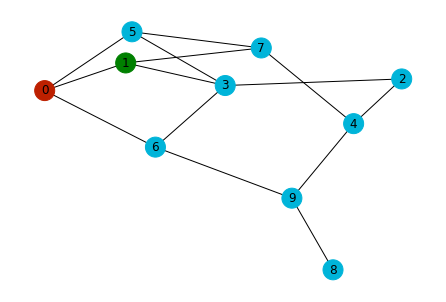

Lista currNode por quemar {5, 6}
currNode ya quemados [0]
currNode protegidos [1]

----------------------------------------


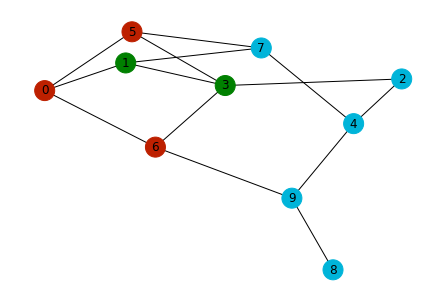

Lista currNode por quemar {9, 7}
currNode ya quemados [0, 5, 6]
currNode protegidos [1, 3]

----------------------------------------


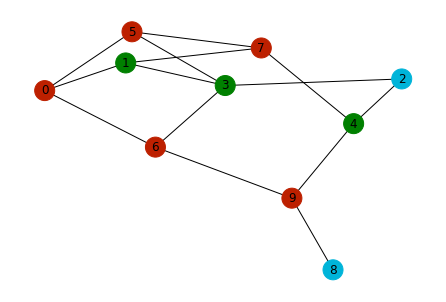

Lista currNode por quemar {8}
currNode ya quemados [0, 5, 6, 9, 7]
currNode protegidos [1, 3, 4]

----------------------------------------


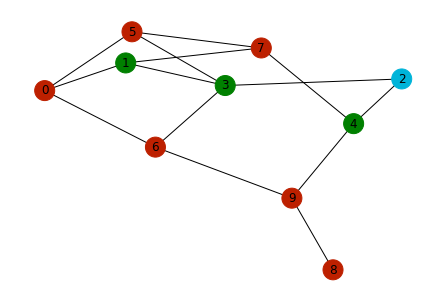

Lista currNode por quemar set()
currNode ya quemados [0, 5, 6, 9, 7, 8]
currNode protegidos [1, 3, 4]

----------------------------------------


6

In [68]:
ffp.resetValues()
ffp.adjacency = numpy.array(matrixSolution)
ffp.ffp(ffp.degreeLocal, True)
ffp.n_burned

#### Biggest Sub-tree

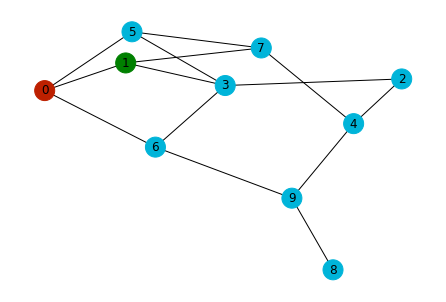

Lista currNode por quemar {5, 6}
currNode ya quemados [0]
currNode protegidos [1]

----------------------------------------


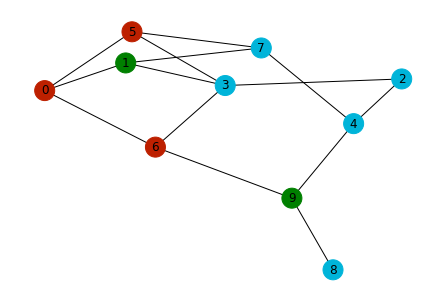

Lista currNode por quemar {3, 7}
currNode ya quemados [0, 5, 6]
currNode protegidos [1, 9]

----------------------------------------


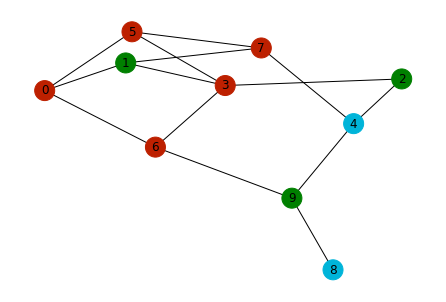

Lista currNode por quemar {4}
currNode ya quemados [0, 5, 6, 3, 7]
currNode protegidos [1, 9, 2]

----------------------------------------


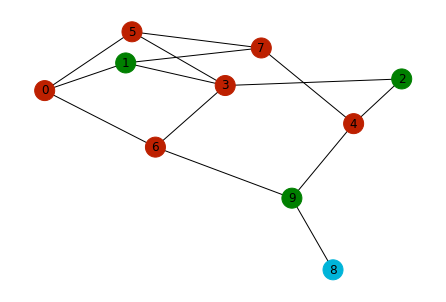

Lista currNode por quemar set()
currNode ya quemados [0, 5, 6, 3, 7, 4]
currNode protegidos [1, 9, 2]

----------------------------------------


6

In [69]:
ffp.resetValues()
ffp.adjacency = numpy.array(matrixSolution)
ffp.ffp(ffp.biggestSubtree, True)
ffp.n_burned

#### Biggest Grandchildren

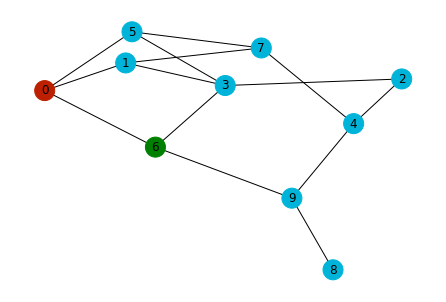

Lista currNode por quemar {1, 5}
currNode ya quemados [0]
currNode protegidos [6]

----------------------------------------


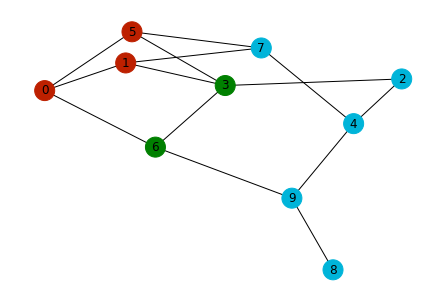

Lista currNode por quemar {7}
currNode ya quemados [0, 1, 5]
currNode protegidos [6, 3]

----------------------------------------


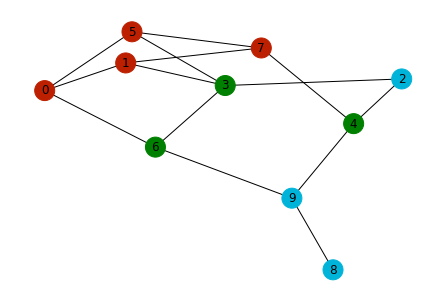

Lista currNode por quemar set()
currNode ya quemados [0, 1, 5, 7]
currNode protegidos [6, 3, 4]

----------------------------------------


4

In [70]:
ffp.resetValues()
ffp.adjacency = numpy.array(matrixSolution)
ffp.ffp(ffp.biggestGrandChildren, True)
ffp.n_burned

### Vizualization of evolution

In [71]:
import seaborn as sns
import pandas as pd

min_val, max_val = 0, 100
intersection_matrix = numpy.array(allBestIndv).transpose()
cm = sns.light_palette("#9E1946", as_cmap=True)
x=pd.DataFrame(intersection_matrix)
x.style.render
x=x.style.background_gradient(cmap=cm)
display(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### References
Transpose a matrix <br>
https://www.journaldev.com/32984/numpy-matrix-transpose-array#:~:text=NumPy%20Matrix%20transpose()%20–%20Transpose%20of%20an%20Array%20in%20Python&text=The%20transpose%20of%20a%20matrix,shape%20(Y%2C%20X). <br>

Display matrix - heatcolor <br>
https://stackoverflow.com/questions/40887753/display-matrix-values-and-colormap